In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create Plots using Pandas
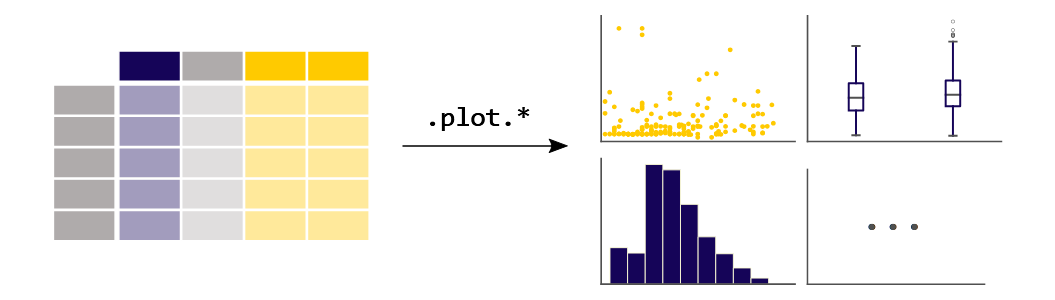

In [5]:
air = pd.read_csv('air_quality_no2.csv', index_col=0, parse_dates=True)
air

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


The usage of the index_col and parse_dates parameters of the read_csv function to define the first (0th) column as index of the resulting DataFrame and convert the dates in the column to Timestamp objects, respectively.

# A quick visual check of the data

<function matplotlib.pyplot.show(close=None, block=None)>

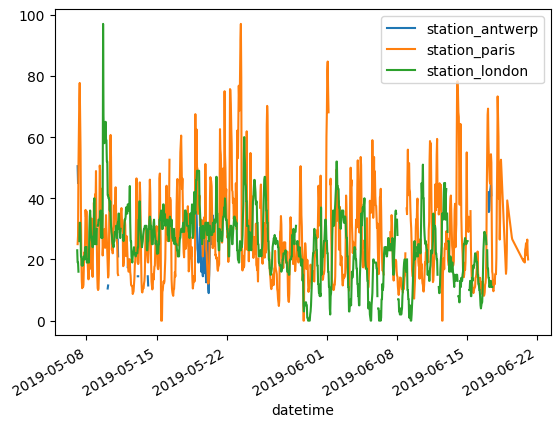

In [11]:
air.plot()
plt.show
# With a DataFrame, pandas creates by default one line plot for each of the columns with numeric data.

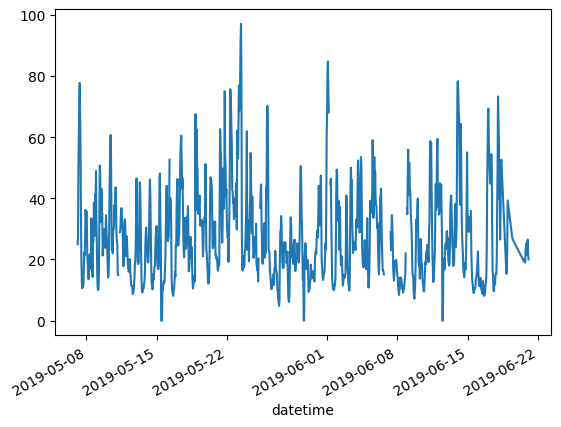

In [12]:
# To plot only the columns of the data table with the data from Paris
air['station_paris'].plot()
plt.show()

To plot a specific column, use the selection method of the subset data tutorial in combination with the plot() method. Hence, the plot() method works on both Series and DataFrame.

To visually compare the NO2 values measured in London versus Paris

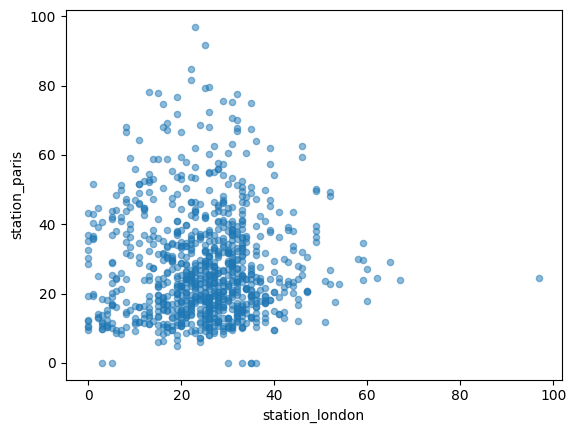

In [15]:
air.plot.scatter(x='station_london',y='station_paris', alpha=0.5)
plt.show()

The plot function uses the line plot by default, there are several plots apart from the line plot.

In [18]:
#Some overview of available plot methods, alternatively type air.plot.+TAB
[
    method_name
    for method_name in dir(air.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

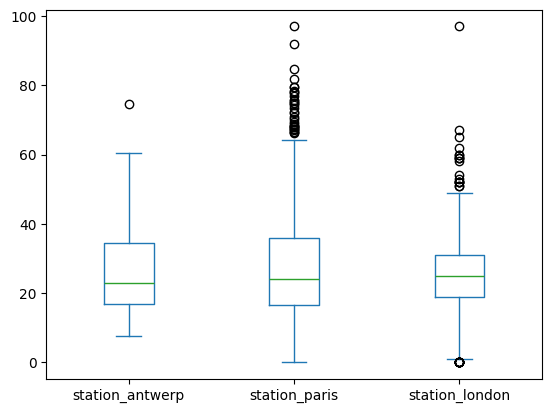

In [19]:
#The box method is applicable on the air quality example data
air.plot.box()
plt.show()

# I want each of the columns in a separate subplot

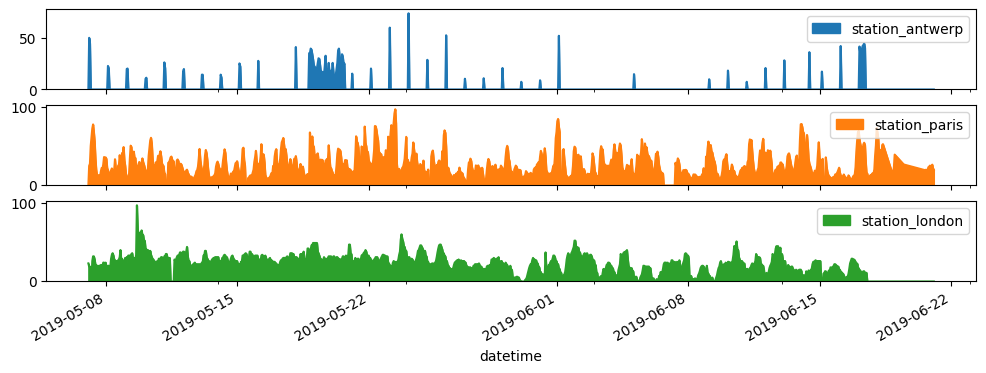

In [ ]:
axs = air.plot.area(figsize=(12, 4), subplots=True) 


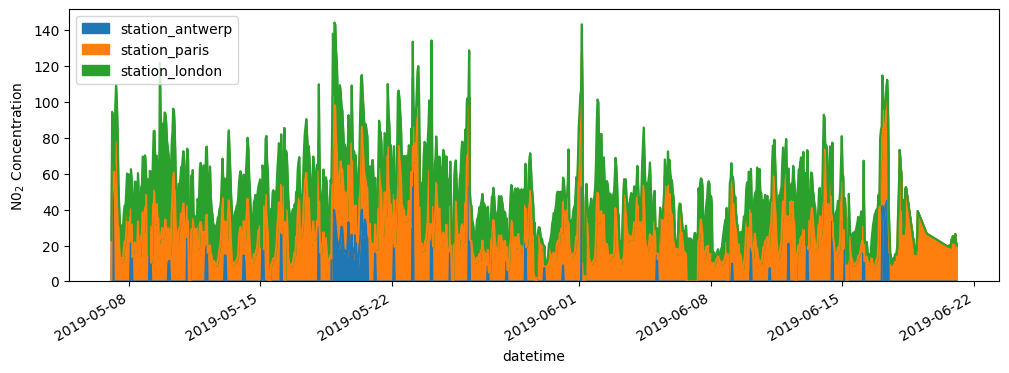

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4)) #Create an empty Matplotlib Figure and Axes
air.plot.area(ax=axs) # Use pandas to put the area plot on the prepared figure/axes
axs.set_ylabel('N0$_2$ Concentration')
fig.savefig('n02_concentrations.png') #Save the figure/axes using the existing matplotlib method
plt.show() #display the plot

The .plot.* methods are applicable on both Series and DataFrames
By default, each of the columns is plotted as a different element (line, boxplot,)
Any plot created by pandas is a Matplotlib object.

# Create New Columns Derived From Existing Columns
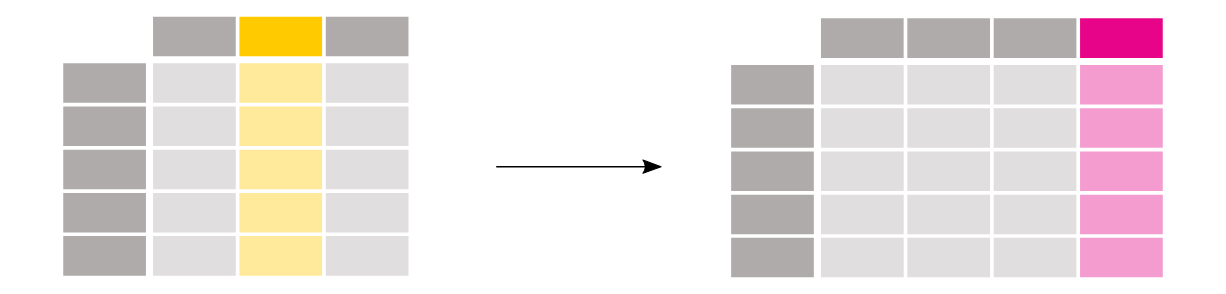

# Express the NO2 Concentration of the station in London in mg/m3
Assume temperature of 25degC and pressure of 1013hPa, the conversion factor is 1.882

In [24]:
#To create a new column, use the [] brackets with the new column name at the left side of the assignment.
air['london_mg_per_cubic']=air['station_london'] * 1.882
air.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


# Check the ratio of the values in Paris vs Antwerp and save results in a new column

In [25]:
air['ratio_paris_antwerp'] = (air['station_paris']/air['station_antwerp'])
air.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


# To rename the data columns to corresponding station identifies

In [27]:
air_renamed = air.rename(
    columns={
        'station_antwerp':'BETR801',
        'station_paris':'FR040414',
        'station_london':'London Westminster'
    }
)
air_renamed.head()

,BETR801,FR040414,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [29]:
air_renamed = air_renamed.rename(columns=str.lower)
air_renamed.head()

,betr801,fr040414,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
